# Import Library

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Data Preprocessing

In [2]:
# Membaca data
data_age_gender = pd.read_csv('data mst_authorization dengan age.csv')
data_implementasi = pd.read_excel('Data Implementasi-1732845308230 1 Jan 2023 - 30 Nov 2024.xlsx')

## Data Age

In [3]:
data_age_gender.rename(columns={'EmployeeCode': 'nik'}, inplace=True)

In [4]:
data_age_gender.columns = data_age_gender.columns.str.lower()

In [5]:
data_age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fullname        529 non-null    object 
 1   jobgradedesc    530 non-null    object 
 2   departmentname  530 non-null    object 
 3   nik             530 non-null    int64  
 4   departmentcode  530 non-null    int64  
 5   email           530 non-null    object 
 6   mobilenumber    530 non-null    object 
 7   site            530 non-null    object 
 8   datecreated     530 non-null    object 
 9   role            530 non-null    object 
 10  age             529 non-null    float64
dtypes: float64(1), int64(2), object(8)
memory usage: 45.7+ KB


In [6]:
data_age_gender.dropna(inplace=True)

## Data Implementasi

In [7]:
data_implementasi.head()

,IdIdea,No Ifi,Nik,Name,Title,Aspek,Department,Judging Status,Date Created,BackgroundProblem,...,AfterImplementation,RepairProses,Benefit,Juri,Adjustment,Avg,Nilai,isIoTValid,isCostSavingValid,isDigitalAnalyticValid
0,17,339/IFI/AIO/02/23,785,Yudiana Yusuf,Penambahan cable duckting safety barrier\t\t\t...,Safety,ENG - YUYUN SUNANDAR,4,2023-02-10T07:58:23.000Z,Kondisi saat ini cable tidak safety berada di ...,...,Setelah dibuatkan cable duckting kondisinya le...,Dibuatkan Penambahan cable duckting untuk pera...,Area tersebut lebih proper dan aman ( safety )...,"Heru Setiyawan,Mugiyono ,Suryawan Prihantoro",NaN,NaN,NaN,NaN,NaN,NaN
1,21,025/IFI/AIO/03/23,1105,Jainu Arifin,Pembatas Area Cooling Tower OC3,Safety,ENG - SUHENDRA GUNAWAN,4,2023-03-01T01:56:16.000Z,tidak ada pembatas potensi terjatuh ketika sed...,...,di harapkan lebih safety ketika melakukan akti...,di pasang pembatas,aspek safety,"Mugiyono ,Heru Setiyawan,Suryawan Prihantoro",NaN,NaN,NaN,NaN,NaN,NaN
2,22,367/IFI/AIO/02/23,1105,Jainu Arifin,Pemasangan curtain area partisi GBL,Product Quality,ENG - SUHENDRA GUNAWAN,4,2023-02-13T01:49:17.000Z,partisi baru belum ada curtainnya,...,potensi pest/serangga masuk bisa minimalisir d...,di pasang curtain,quality impact,"Heru Setiyawan,Offan Effendy,Suryawan Prihantoro",NaN,NaN,NaN,NaN,NaN,NaN
3,51,616/IFI/AIO/02/23,4289,Gilang Cahya,pergantian alty filter Conveyor PS ke pre filter,Cost Reduction,PROD AL 4 - MUHAMMAD SYAROFUDDIN,4,2023-02-26T01:38:03.000Z,penggunaan alti filter cost pengeluaran lebih...,...,Reduce cost untuk pembelian filter pada prefor...,penggantian filter disaat maintenance dilakukan,Reduce cost untuk pembelian filter pada prefor...,"Moh Mohaimin,Sichabudin Se,Sichabudin Se,Surya...",NaN,NaN,NaN,NaN,NaN,NaN
4,52,026/IFI/AIO/01/23,4289,Gilang Cahya,OPL replace CV bounching injection machine,Work Efficiency - Area Process,PROD AL 4 - MUHAMMAD SYAROFUDDIN,4,2023-01-17T05:22:39.000Z,tidak ada panduan kerja,...,dengan adanya OPL ini efisensi pekerjaan lebih...,OPL dibuat saat proses maintenance dilakukan,langkah pengerjaan atau perbaikan lebih tertat...,"Moh Mohaimin,Suryawan Prihantoro",NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_implementasi = data_implementasi[['IdIdea', 'Nik', 'Aspek', 'Department', 'Date Created']]

In [9]:
data_implementasi.rename(columns={'Department': 'Departement Facilitator'}, inplace=True)



In [10]:
data_implementasi['Department'] = data_implementasi['Departement Facilitator'].str.split(' - ').str[0]
data_implementasi

,IdIdea,Nik,Aspek,Departement Facilitator,Date Created,Department
0,17,785,Safety,ENG - YUYUN SUNANDAR,2023-02-10T07:58:23.000Z,ENG
1,21,1105,Safety,ENG - SUHENDRA GUNAWAN,2023-03-01T01:56:16.000Z,ENG
2,22,1105,Product Quality,ENG - SUHENDRA GUNAWAN,2023-02-13T01:49:17.000Z,ENG
3,51,4289,Cost Reduction,PROD AL 4 - MUHAMMAD SYAROFUDDIN,2023-02-26T01:38:03.000Z,PROD AL 4
4,52,4289,Work Efficiency - Area Process,PROD AL 4 - MUHAMMAD SYAROFUDDIN,2023-01-17T05:22:39.000Z,PROD AL 4
...,...,...,...,...,...,...
6710,13571,4331,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,2024-11-28T09:11:27.000Z,IT INFRA STRUCTURE & INDUSTRlAL
6711,13572,4331,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,2024-11-28T09:14:37.000Z,IT INFRA STRUCTURE & INDUSTRlAL
6712,13573,4331,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,2024-11-28T09:01:28.000Z,IT INFRA STRUCTURE & INDUSTRlAL
6713,13592,4265,Work Efficiency - Area Office,FINANCE & ACCOUNTING - A. HAFIDH FAIDHONI,2024-11-29T01:47:21.000Z,FINANCE & ACCOUNTING


In [11]:
data_implementasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6715 entries, 0 to 6714
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   IdIdea                   6715 non-null   int64 
 1   Nik                      6715 non-null   int64 
 2   Aspek                    6715 non-null   object
 3   Departement Facilitator  6715 non-null   object
 4   Date Created             6715 non-null   object
 5   Department               6715 non-null   object
dtypes: int64(2), object(4)
memory usage: 314.9+ KB


In [12]:
data_implementasi['Date Created'] = pd.to_datetime(data_implementasi['Date Created'])
data_implementasi.columns = data_implementasi.columns.str.lower()
data_implementasi.columns = data_implementasi.columns.str.replace(' ', '_')
data_implementasi

,ididea,nik,aspek,departement_facilitator,date_created,department
0,17,785,Safety,ENG - YUYUN SUNANDAR,2023-02-10 07:58:23+00:00,ENG
1,21,1105,Safety,ENG - SUHENDRA GUNAWAN,2023-03-01 01:56:16+00:00,ENG
2,22,1105,Product Quality,ENG - SUHENDRA GUNAWAN,2023-02-13 01:49:17+00:00,ENG
3,51,4289,Cost Reduction,PROD AL 4 - MUHAMMAD SYAROFUDDIN,2023-02-26 01:38:03+00:00,PROD AL 4
4,52,4289,Work Efficiency - Area Process,PROD AL 4 - MUHAMMAD SYAROFUDDIN,2023-01-17 05:22:39+00:00,PROD AL 4
...,...,...,...,...,...,...
6710,13571,4331,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,2024-11-28 09:11:27+00:00,IT INFRA STRUCTURE & INDUSTRlAL
6711,13572,4331,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,2024-11-28 09:14:37+00:00,IT INFRA STRUCTURE & INDUSTRlAL
6712,13573,4331,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,2024-11-28 09:01:28+00:00,IT INFRA STRUCTURE & INDUSTRlAL
6713,13592,4265,Work Efficiency - Area Office,FINANCE & ACCOUNTING - A. HAFIDH FAIDHONI,2024-11-29 01:47:21+00:00,FINANCE & ACCOUNTING


In [13]:
data_implementasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6715 entries, 0 to 6714
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   ididea                   6715 non-null   int64              
 1   nik                      6715 non-null   int64              
 2   aspek                    6715 non-null   object             
 3   departement_facilitator  6715 non-null   object             
 4   date_created             6715 non-null   datetime64[ns, UTC]
 5   department               6715 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 314.9+ KB


In [14]:
data_age_gender.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 0 to 529
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fullname        529 non-null    object 
 1   jobgradedesc    529 non-null    object 
 2   departmentname  529 non-null    object 
 3   nik             529 non-null    int64  
 4   departmentcode  529 non-null    int64  
 5   email           529 non-null    object 
 6   mobilenumber    529 non-null    object 
 7   site            529 non-null    object 
 8   datecreated     529 non-null    object 
 9   role            529 non-null    object 
 10  age             529 non-null    float64
dtypes: float64(1), int64(2), object(8)
memory usage: 49.6+ KB


## Data Gabungan

In [15]:
# Menggabungkan data berdasarkan 'nik'
merged_data = pd.merge(data_implementasi, data_age_gender, on='nik')
merged_data

,ididea,nik,aspek,departement_facilitator,date_created,department,fullname,jobgradedesc,departmentname,departmentcode,email,mobilenumber,site,datecreated,role,age
0,17,785,Safety,ENG - YUYUN SUNANDAR,2023-02-10 07:58:23+00:00,ENG,Yudiana Yusuf,Staff,ENG - YUYUN SUNANDAR,243,yudianayusuf123@gmail.com,081315495850,Sukabumi,2023-01-03 20:25:26,User,46.0
1,21,1105,Safety,ENG - SUHENDRA GUNAWAN,2023-03-01 01:56:16+00:00,ENG,Jainu Arifin,Senior Staff,ENG - SUHENDRA GUNAWAN,244,jainu.arifin@gmail.com,08991729922,Sukabumi,2023-01-03 20:25:26,User,38.0
2,22,1105,Product Quality,ENG - SUHENDRA GUNAWAN,2023-02-13 01:49:17+00:00,ENG,Jainu Arifin,Senior Staff,ENG - SUHENDRA GUNAWAN,244,jainu.arifin@gmail.com,08991729922,Sukabumi,2023-01-03 20:25:26,User,38.0
3,51,4289,Cost Reduction,PROD AL 4 - MUHAMMAD SYAROFUDDIN,2023-02-26 01:38:03+00:00,PROD AL 4,Gilang Cahya,Staff,PROD AL 4 - MUHAMMAD SYAROFUDDIN,270,gilangch03@gmail.com,085283871808,Sukabumi,2023-01-17 08:43:31,User,31.0
4,52,4289,Work Efficiency - Area Process,PROD AL 4 - MUHAMMAD SYAROFUDDIN,2023-01-17 05:22:39+00:00,PROD AL 4,Gilang Cahya,Staff,PROD AL 4 - MUHAMMAD SYAROFUDDIN,270,gilangch03@gmail.com,085283871808,Sukabumi,2023-01-17 08:43:31,User,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,13571,4331,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,2024-11-28 09:11:27+00:00,IT INFRA STRUCTURE & INDUSTRlAL,Wildan Abdul Barri,Staff,IT INFRA STRUCTURE & INDUSTRlAL,259,wbarri@aio.co.id,087889295499,Sukabumi,2023-11-15 07:58:50,User,25.0
6732,13572,4331,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,2024-11-28 09:14:37+00:00,IT INFRA STRUCTURE & INDUSTRlAL,Wildan Abdul Barri,Staff,IT INFRA STRUCTURE & INDUSTRlAL,259,wbarri@aio.co.id,087889295499,Sukabumi,2023-11-15 07:58:50,User,25.0
6733,13573,4331,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,2024-11-28 09:01:28+00:00,IT INFRA STRUCTURE & INDUSTRlAL,Wildan Abdul Barri,Staff,IT INFRA STRUCTURE & INDUSTRlAL,259,wbarri@aio.co.id,087889295499,Sukabumi,2023-11-15 07:58:50,User,25.0
6734,13592,4265,Work Efficiency - Area Office,FINANCE & ACCOUNTING - A. HAFIDH FAIDHONI,2024-11-29 01:47:21+00:00,FINANCE & ACCOUNTING,Ghifari Gandi Putra,Staff,FINANCE & ACCOUNTING - A. HAFIDH FAIDHONI,252,ghifarigandi@gmail.com,082126911627,Sukabumi,2023-01-03 20:25:26,User,26.0


In [16]:
# Kategorisasi umur
def categorize_age(age):
    if age <= 25:
        return 1
    elif 25 < age <= 35:
        return 2
    elif 36 <= age <= 45:
        return 3
    elif 46 <= age <= 55:
        return 4
    else:
        return 5

merged_data['age_group'] = merged_data['age'].apply(categorize_age)
merged_data

,ididea,nik,aspek,departement_facilitator,date_created,department,fullname,jobgradedesc,departmentname,departmentcode,email,mobilenumber,site,datecreated,role,age,age_group
0,17,785,Safety,ENG - YUYUN SUNANDAR,2023-02-10 07:58:23+00:00,ENG,Yudiana Yusuf,Staff,ENG - YUYUN SUNANDAR,243,yudianayusuf123@gmail.com,081315495850,Sukabumi,2023-01-03 20:25:26,User,46.0,4
1,21,1105,Safety,ENG - SUHENDRA GUNAWAN,2023-03-01 01:56:16+00:00,ENG,Jainu Arifin,Senior Staff,ENG - SUHENDRA GUNAWAN,244,jainu.arifin@gmail.com,08991729922,Sukabumi,2023-01-03 20:25:26,User,38.0,3
2,22,1105,Product Quality,ENG - SUHENDRA GUNAWAN,2023-02-13 01:49:17+00:00,ENG,Jainu Arifin,Senior Staff,ENG - SUHENDRA GUNAWAN,244,jainu.arifin@gmail.com,08991729922,Sukabumi,2023-01-03 20:25:26,User,38.0,3
3,51,4289,Cost Reduction,PROD AL 4 - MUHAMMAD SYAROFUDDIN,2023-02-26 01:38:03+00:00,PROD AL 4,Gilang Cahya,Staff,PROD AL 4 - MUHAMMAD SYAROFUDDIN,270,gilangch03@gmail.com,085283871808,Sukabumi,2023-01-17 08:43:31,User,31.0,2
4,52,4289,Work Efficiency - Area Process,PROD AL 4 - MUHAMMAD SYAROFUDDIN,2023-01-17 05:22:39+00:00,PROD AL 4,Gilang Cahya,Staff,PROD AL 4 - MUHAMMAD SYAROFUDDIN,270,gilangch03@gmail.com,085283871808,Sukabumi,2023-01-17 08:43:31,User,31.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,13571,4331,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,2024-11-28 09:11:27+00:00,IT INFRA STRUCTURE & INDUSTRlAL,Wildan Abdul Barri,Staff,IT INFRA STRUCTURE & INDUSTRlAL,259,wbarri@aio.co.id,087889295499,Sukabumi,2023-11-15 07:58:50,User,25.0,1
6732,13572,4331,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,2024-11-28 09:14:37+00:00,IT INFRA STRUCTURE & INDUSTRlAL,Wildan Abdul Barri,Staff,IT INFRA STRUCTURE & INDUSTRlAL,259,wbarri@aio.co.id,087889295499,Sukabumi,2023-11-15 07:58:50,User,25.0,1
6733,13573,4331,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,2024-11-28 09:01:28+00:00,IT INFRA STRUCTURE & INDUSTRlAL,Wildan Abdul Barri,Staff,IT INFRA STRUCTURE & INDUSTRlAL,259,wbarri@aio.co.id,087889295499,Sukabumi,2023-11-15 07:58:50,User,25.0,1
6734,13592,4265,Work Efficiency - Area Office,FINANCE & ACCOUNTING - A. HAFIDH FAIDHONI,2024-11-29 01:47:21+00:00,FINANCE & ACCOUNTING,Ghifari Gandi Putra,Staff,FINANCE & ACCOUNTING - A. HAFIDH FAIDHONI,252,ghifarigandi@gmail.com,082126911627,Sukabumi,2023-01-03 20:25:26,User,26.0,2


In [17]:
merged_data.to_csv('data_ifi_new.csv', index=False)

In [18]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   ididea                   6736 non-null   int64              
 1   nik                      6736 non-null   int64              
 2   aspek                    6736 non-null   object             
 3   departement_facilitator  6736 non-null   object             
 4   date_created             6736 non-null   datetime64[ns, UTC]
 5   department               6736 non-null   object             
 6   fullname                 6736 non-null   object             
 7   jobgradedesc             6736 non-null   object             
 8   departmentname           6736 non-null   object             
 9   departmentcode           6736 non-null   int64              
 10  email                    6736 non-null   object             
 11  mobilenumber             6736 

In [19]:
merged_data.head()

,ididea,nik,aspek,departement_facilitator,date_created,department,fullname,jobgradedesc,departmentname,departmentcode,email,mobilenumber,site,datecreated,role,age,age_group
0,17,785,Safety,ENG - YUYUN SUNANDAR,2023-02-10 07:58:23+00:00,ENG,Yudiana Yusuf,Staff,ENG - YUYUN SUNANDAR,243,yudianayusuf123@gmail.com,081315495850,Sukabumi,2023-01-03 20:25:26,User,46.0,4
1,21,1105,Safety,ENG - SUHENDRA GUNAWAN,2023-03-01 01:56:16+00:00,ENG,Jainu Arifin,Senior Staff,ENG - SUHENDRA GUNAWAN,244,jainu.arifin@gmail.com,08991729922,Sukabumi,2023-01-03 20:25:26,User,38.0,3
2,22,1105,Product Quality,ENG - SUHENDRA GUNAWAN,2023-02-13 01:49:17+00:00,ENG,Jainu Arifin,Senior Staff,ENG - SUHENDRA GUNAWAN,244,jainu.arifin@gmail.com,08991729922,Sukabumi,2023-01-03 20:25:26,User,38.0,3
3,51,4289,Cost Reduction,PROD AL 4 - MUHAMMAD SYAROFUDDIN,2023-02-26 01:38:03+00:00,PROD AL 4,Gilang Cahya,Staff,PROD AL 4 - MUHAMMAD SYAROFUDDIN,270,gilangch03@gmail.com,085283871808,Sukabumi,2023-01-17 08:43:31,User,31.0,2
4,52,4289,Work Efficiency - Area Process,PROD AL 4 - MUHAMMAD SYAROFUDDIN,2023-01-17 05:22:39+00:00,PROD AL 4,Gilang Cahya,Staff,PROD AL 4 - MUHAMMAD SYAROFUDDIN,270,gilangch03@gmail.com,085283871808,Sukabumi,2023-01-17 08:43:31,User,31.0,2


In [20]:
merged_data = merged_data[['ididea', 'date_created', 'aspek', 'department', 'age', 'age_group']]
merged_data

,ididea,date_created,aspek,department,age,age_group
0,17,2023-02-10 07:58:23+00:00,Safety,ENG,46.0,4
1,21,2023-03-01 01:56:16+00:00,Safety,ENG,38.0,3
2,22,2023-02-13 01:49:17+00:00,Product Quality,ENG,38.0,3
3,51,2023-02-26 01:38:03+00:00,Cost Reduction,PROD AL 4,31.0,2
4,52,2023-01-17 05:22:39+00:00,Work Efficiency - Area Process,PROD AL 4,31.0,2
...,...,...,...,...,...,...
6731,13571,2024-11-28 09:11:27+00:00,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,25.0,1
6732,13572,2024-11-28 09:14:37+00:00,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,25.0,1
6733,13573,2024-11-28 09:01:28+00:00,Work Efficiency - Area Office,IT INFRA STRUCTURE & INDUSTRlAL,25.0,1
6734,13592,2024-11-29 01:47:21+00:00,Work Efficiency - Area Office,FINANCE & ACCOUNTING,26.0,2


In [21]:
ordinal_encoder = OrdinalEncoder()
merged_data[['aspek', 'department']] = ordinal_encoder.fit_transform(merged_data[['aspek', 'department']])
merged_data

C:\Users\vyuwono\AppData\Local\Temp\ipykernel_3524\4130049234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[['aspek', 'department']] = ordinal_encoder.fit_transform(merged_data[['aspek', 'department']])


,ididea,date_created,aspek,department,age,age_group
0,17,2023-02-10 07:58:23+00:00,4.0,2.0,46.0,4
1,21,2023-03-01 01:56:16+00:00,4.0,2.0,38.0,3
2,22,2023-02-13 01:49:17+00:00,3.0,2.0,38.0,3
3,51,2023-02-26 01:38:03+00:00,0.0,12.0,31.0,2
4,52,2023-01-17 05:22:39+00:00,6.0,12.0,31.0,2
...,...,...,...,...,...,...
6731,13571,2024-11-28 09:11:27+00:00,5.0,7.0,25.0,1
6732,13572,2024-11-28 09:14:37+00:00,5.0,7.0,25.0,1
6733,13573,2024-11-28 09:01:28+00:00,5.0,7.0,25.0,1
6734,13592,2024-11-29 01:47:21+00:00,5.0,3.0,26.0,2


In [22]:
merged_data

,ididea,date_created,aspek,department,age,age_group
0,17,2023-02-10 07:58:23+00:00,4.0,2.0,46.0,4
1,21,2023-03-01 01:56:16+00:00,4.0,2.0,38.0,3
2,22,2023-02-13 01:49:17+00:00,3.0,2.0,38.0,3
3,51,2023-02-26 01:38:03+00:00,0.0,12.0,31.0,2
4,52,2023-01-17 05:22:39+00:00,6.0,12.0,31.0,2
...,...,...,...,...,...,...
6731,13571,2024-11-28 09:11:27+00:00,5.0,7.0,25.0,1
6732,13572,2024-11-28 09:14:37+00:00,5.0,7.0,25.0,1
6733,13573,2024-11-28 09:01:28+00:00,5.0,7.0,25.0,1
6734,13592,2024-11-29 01:47:21+00:00,5.0,3.0,26.0,2


In [23]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   ididea        6736 non-null   int64              
 1   date_created  6736 non-null   datetime64[ns, UTC]
 2   aspek         6736 non-null   float64            
 3   department    6736 non-null   float64            
 4   age           6736 non-null   float64            
 5   age_group     6736 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(2)
memory usage: 315.9 KB


In [24]:
clustering_data = merged_data[['aspek', 'department', 'age', 'age_group']]
clustering_data

,aspek,department,age,age_group
0,4.0,2.0,46.0,4
1,4.0,2.0,38.0,3
2,3.0,2.0,38.0,3
3,0.0,12.0,31.0,2
4,6.0,12.0,31.0,2
...,...,...,...,...
6731,5.0,7.0,25.0,1
6732,5.0,7.0,25.0,1
6733,5.0,7.0,25.0,1
6734,5.0,3.0,26.0,2


## CLustering

In [25]:
# Dimensionality Reduction using PCA

pca = PCA()
pca.fit(clustering_data)

PCA()

In [26]:
# Check the number of features if we want to retain 80 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.80) + 1
num_features

np.int64(2)

In [27]:
# Let's train the model with 80 % of the original dataset information

pca = PCA(n_components=2)
pca.fit(clustering_data)

df_scaled_pca = pca.transform(clustering_data)

In [28]:
df_scaled_pca

array([[ 13.27561946, -10.12442152],
       [  5.21701837,  -9.9688029 ],
       [  5.22954124,  -9.9824315 ],
       ...,
       [ -7.83364714,  -4.69916987],
       [ -6.81180744,  -8.72847295],
       [ -6.81180744,  -8.72847295]])

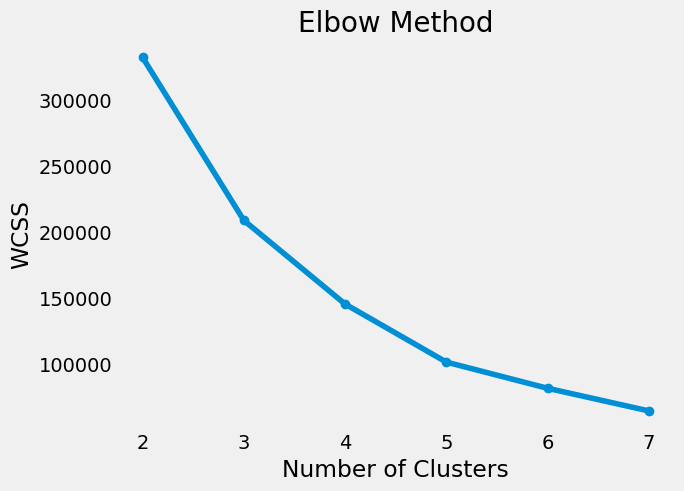

In [29]:
# Find the optimal number of clusters using Elbow Method
wcss = []
random_state = 10
max_cluster = 7
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
# Melakukan clustering menggunakan K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(clustering_data)
merged_data

C:\Users\vyuwono\AppData\Local\Temp\ipykernel_3524\1731853458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['cluster'] = kmeans.fit_predict(clustering_data)


,ididea,date_created,aspek,department,age,age_group,cluster
0,17,2023-02-10 07:58:23+00:00,4.0,2.0,46.0,4,3
1,21,2023-03-01 01:56:16+00:00,4.0,2.0,38.0,3,3
2,22,2023-02-13 01:49:17+00:00,3.0,2.0,38.0,3,3
3,51,2023-02-26 01:38:03+00:00,0.0,12.0,31.0,2,2
4,52,2023-01-17 05:22:39+00:00,6.0,12.0,31.0,2,2
...,...,...,...,...,...,...,...
6731,13571,2024-11-28 09:11:27+00:00,5.0,7.0,25.0,1,4
6732,13572,2024-11-28 09:14:37+00:00,5.0,7.0,25.0,1,4
6733,13573,2024-11-28 09:01:28+00:00,5.0,7.0,25.0,1,4
6734,13592,2024-11-29 01:47:21+00:00,5.0,3.0,26.0,2,4


<Axes: >

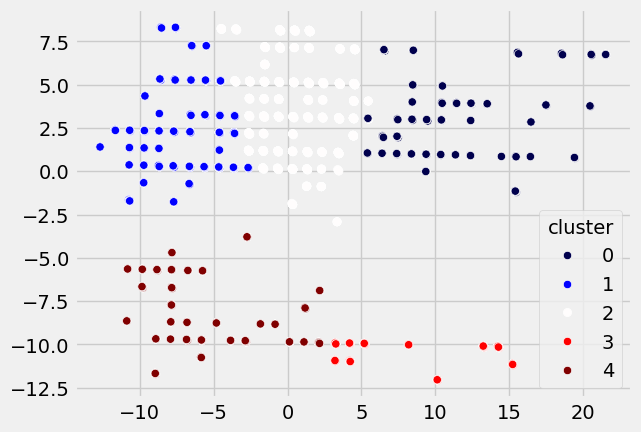

In [31]:
# Cluster visualization in 2D

sns.scatterplot(x=df_scaled_pca[:,0], y=df_scaled_pca[:,1], hue=merged_data['cluster'], palette='seismic')

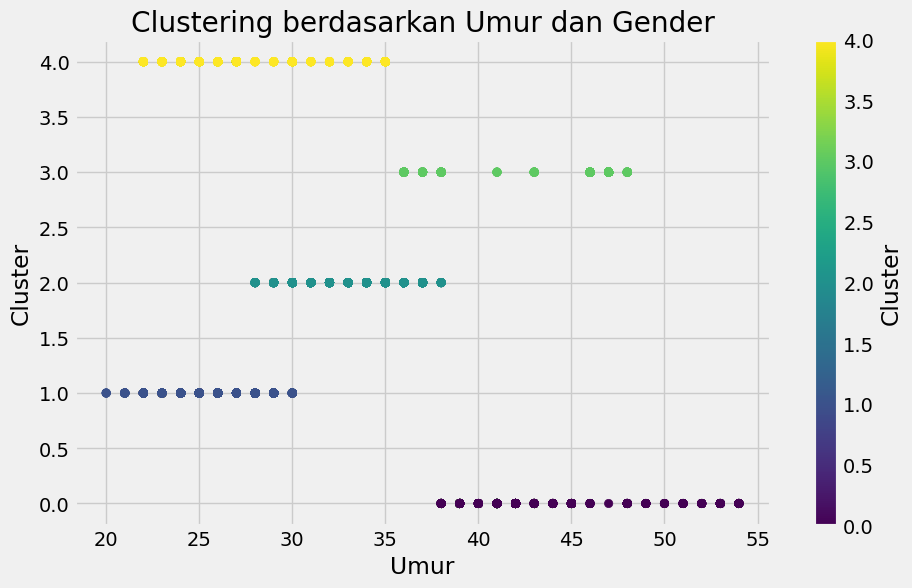

In [32]:

# Menampilkan hasil clustering
# print(merged_data[['nik', 'age', 'age_group', 'gender_code', 'cluster']])

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['age'], merged_data['cluster'], c=merged_data['cluster'], cmap='viridis')
plt.title('Clustering berdasarkan Umur dan Gender')
plt.xlabel('Umur')
plt.ylabel('Cluster')
plt.colorbar(label='Cluster')
plt.show()

In [33]:
merged_data

,ididea,date_created,aspek,department,age,age_group,cluster
0,17,2023-02-10 07:58:23+00:00,4.0,2.0,46.0,4,3
1,21,2023-03-01 01:56:16+00:00,4.0,2.0,38.0,3,3
2,22,2023-02-13 01:49:17+00:00,3.0,2.0,38.0,3,3
3,51,2023-02-26 01:38:03+00:00,0.0,12.0,31.0,2,2
4,52,2023-01-17 05:22:39+00:00,6.0,12.0,31.0,2,2
...,...,...,...,...,...,...,...
6731,13571,2024-11-28 09:11:27+00:00,5.0,7.0,25.0,1,4
6732,13572,2024-11-28 09:14:37+00:00,5.0,7.0,25.0,1,4
6733,13573,2024-11-28 09:01:28+00:00,5.0,7.0,25.0,1,4
6734,13592,2024-11-29 01:47:21+00:00,5.0,3.0,26.0,2,4


In [34]:
merged_data['cluster'].value_counts()

cluster
2    2285
1    1700
4    1161
0    1019
3     571
Name: count, dtype: int64

In [35]:
merged_data['bulan_tahun'] = merged_data['date_created'].dt.strftime('%m-%Y')
merged_data

C:\Users\vyuwono\AppData\Local\Temp\ipykernel_3524\2691746634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['bulan_tahun'] = merged_data['date_created'].dt.strftime('%m-%Y')


,ididea,date_created,aspek,department,age,age_group,cluster,bulan_tahun
0,17,2023-02-10 07:58:23+00:00,4.0,2.0,46.0,4,3,02-2023
1,21,2023-03-01 01:56:16+00:00,4.0,2.0,38.0,3,3,03-2023
2,22,2023-02-13 01:49:17+00:00,3.0,2.0,38.0,3,3,02-2023
3,51,2023-02-26 01:38:03+00:00,0.0,12.0,31.0,2,2,02-2023
4,52,2023-01-17 05:22:39+00:00,6.0,12.0,31.0,2,2,01-2023
...,...,...,...,...,...,...,...,...
6731,13571,2024-11-28 09:11:27+00:00,5.0,7.0,25.0,1,4,11-2024
6732,13572,2024-11-28 09:14:37+00:00,5.0,7.0,25.0,1,4,11-2024
6733,13573,2024-11-28 09:01:28+00:00,5.0,7.0,25.0,1,4,11-2024
6734,13592,2024-11-29 01:47:21+00:00,5.0,3.0,26.0,2,4,11-2024


# Forecasting Per Aspek 

In [133]:
count_data = merged_data.groupby(['aspek', 'bulan_tahun']).size().reset_index(name='count')
count_data

,aspek,bulan_tahun,count
0,0.0,01-2023,1
1,0.0,01-2024,2
2,0.0,02-2023,6
3,0.0,02-2024,1
4,0.0,03-2023,6
...,...,...,...
153,6.0,10-2023,109
154,6.0,10-2024,162
155,6.0,11-2023,242
156,6.0,11-2024,355


In [134]:
count_data['bulan_tahun'] = pd.to_datetime(count_data['bulan_tahun'], format='%m-%Y')

In [135]:
count_data = count_data.sort_values(by='bulan_tahun')
count_data

,aspek,bulan_tahun,count
0,0.0,2023-01-01,1
66,3.0,2023-01-01,6
89,4.0,2023-01-01,8
43,2.0,2023-01-01,5
112,5.0,2023-01-01,6
...,...,...,...
64,2.0,2024-11-01,37
156,6.0,2024-11-01,355
42,1.0,2024-11-01,5
110,4.0,2024-11-01,78


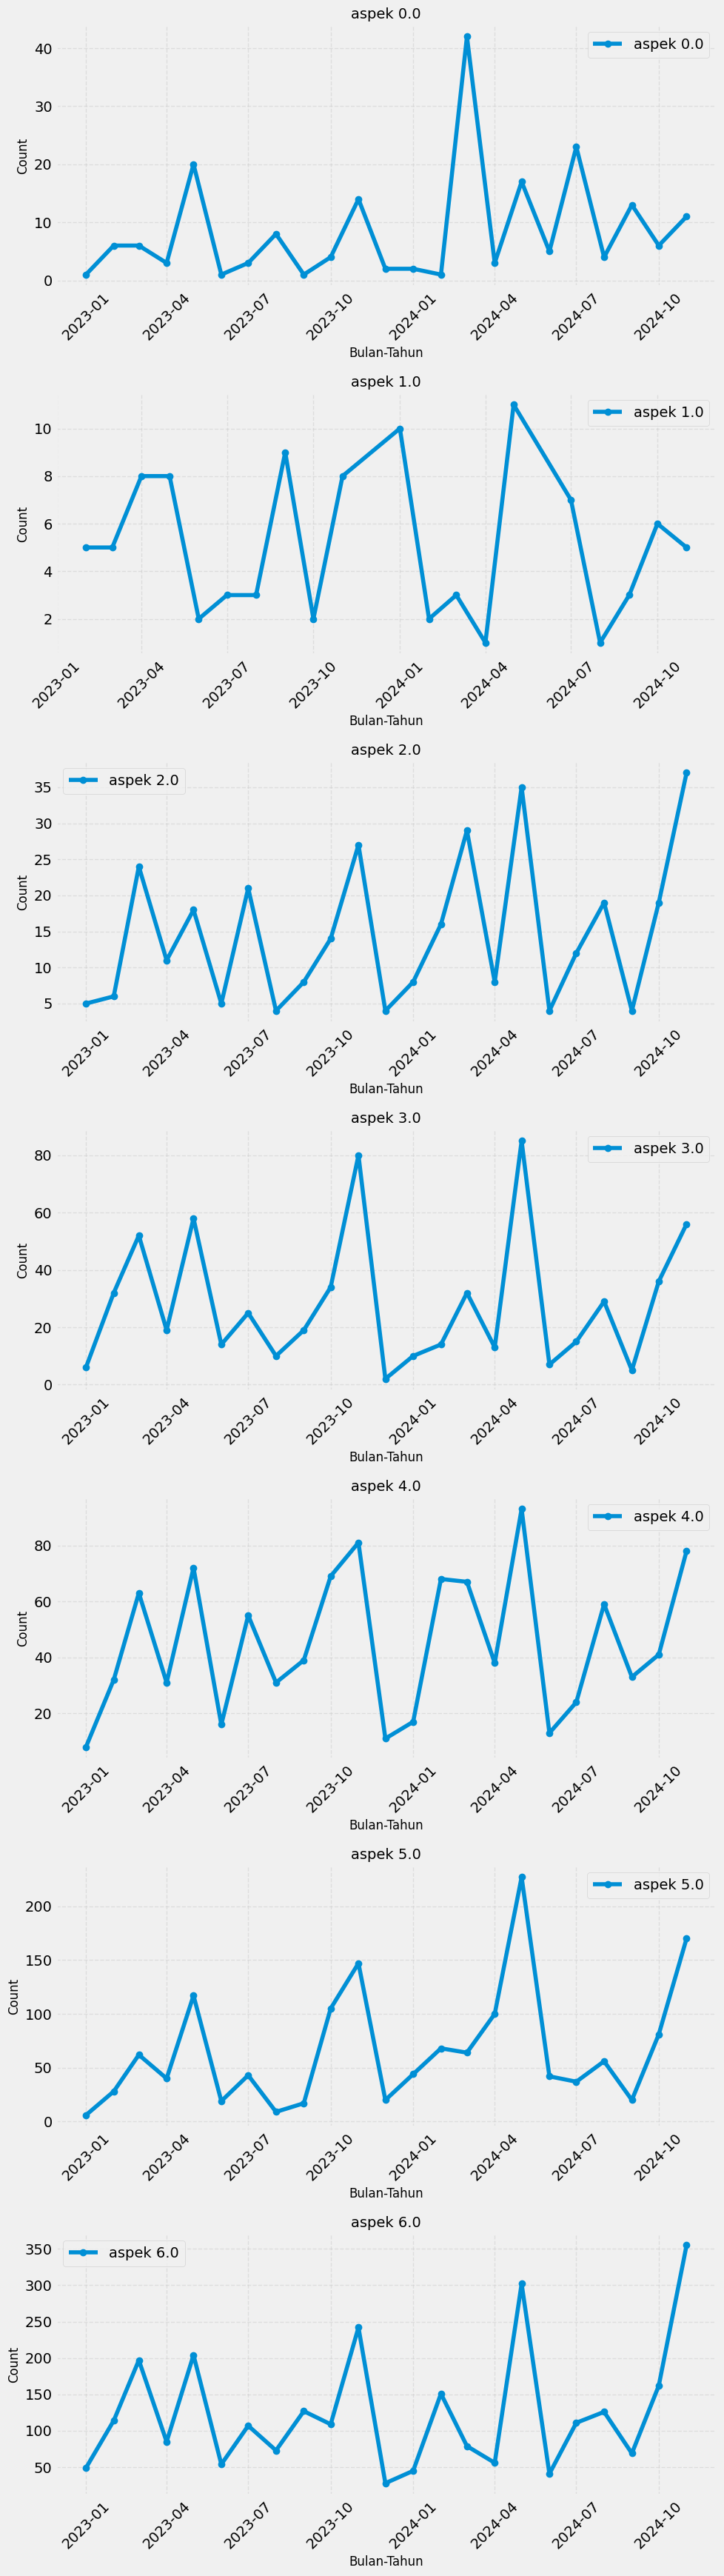

In [39]:
# Mendapatkan jumlah cluster unik
clusters = count_data['aspek'].unique()
clusters = sorted(clusters)

# Membuat subplots
fig, axes = plt.subplots(nrows=len(clusters), ncols=1, figsize=(10, 5 * len(clusters)))

# Jika hanya ada satu cluster, jadikan axes sebagai list
if len(clusters) == 1:
    axes = [axes]

# Iterasi setiap cluster untuk plot di subplot masing-masing
for ax, cluster_id in zip(axes, clusters):
    # Filter data per cluster
    cluster_data = count_data[count_data['aspek'] == cluster_id]
    
    # Plot line chart untuk cluster ini
    ax.plot(cluster_data['bulan_tahun'], cluster_data['count'], marker='o', label=f'aspek {cluster_id}')
    
    # Detail plot
    ax.set_title(f'aspek {cluster_id}', fontsize=14)
    ax.set_xlabel('Bulan-Tahun', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Tampilkan grafik
plt.show()

Forecasting untuk cluster 0.0


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vyuwono\AppData\Local\Temp\ipykernel_3524\2370567600.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.da

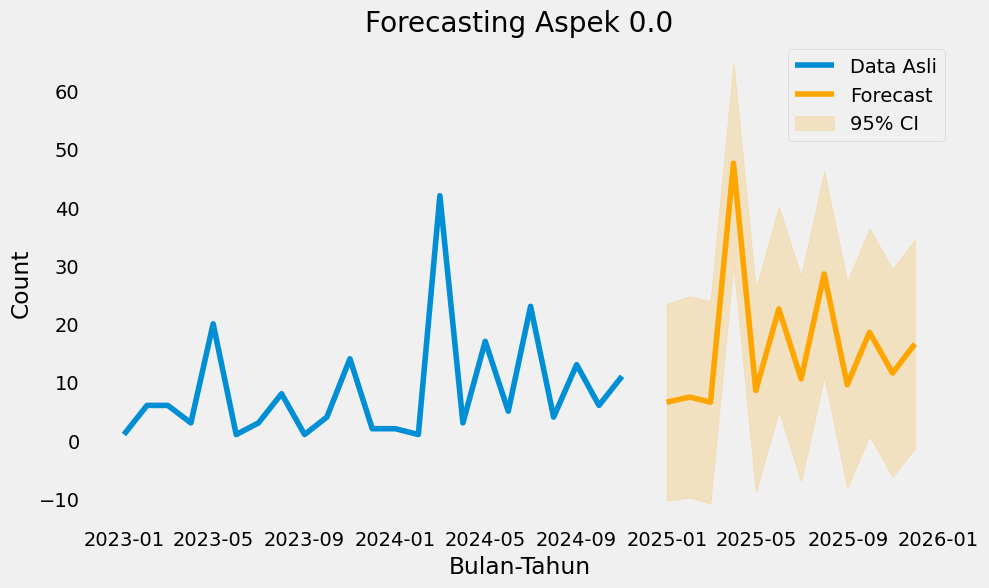

Forecasting untuk cluster 1.0


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\

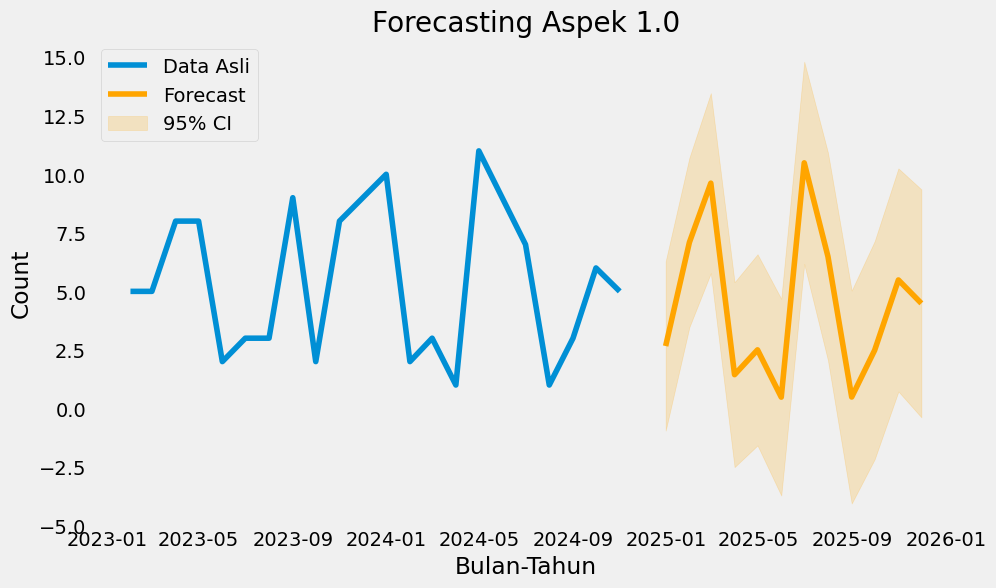

Forecasting untuk cluster 2.0


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vyuwono\AppData\Local\Temp\ipykernel_3524\2370567600.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.da

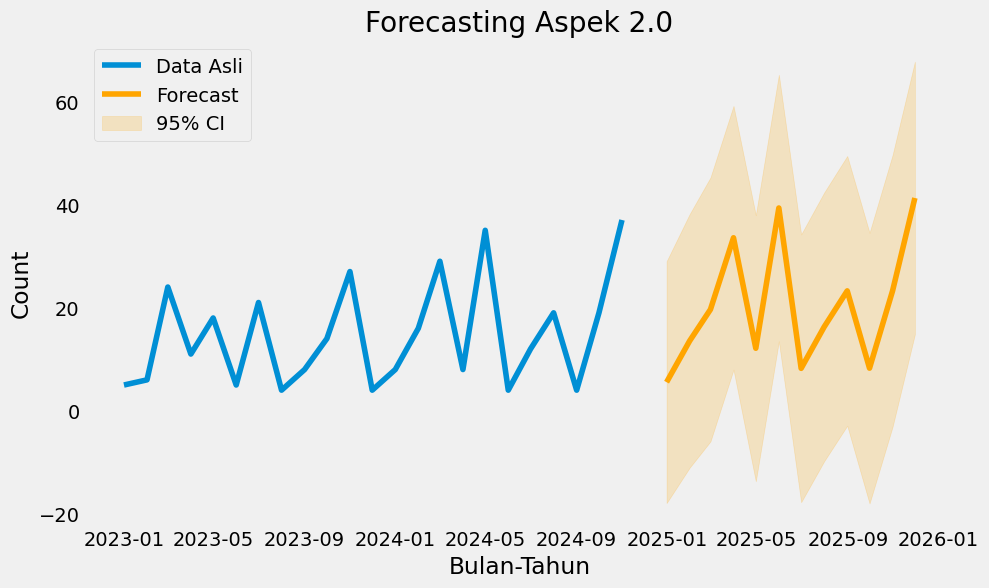

Forecasting untuk cluster 3.0


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vyuwono\AppData\Local\Temp\ipykernel_3524\2370567600.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.da

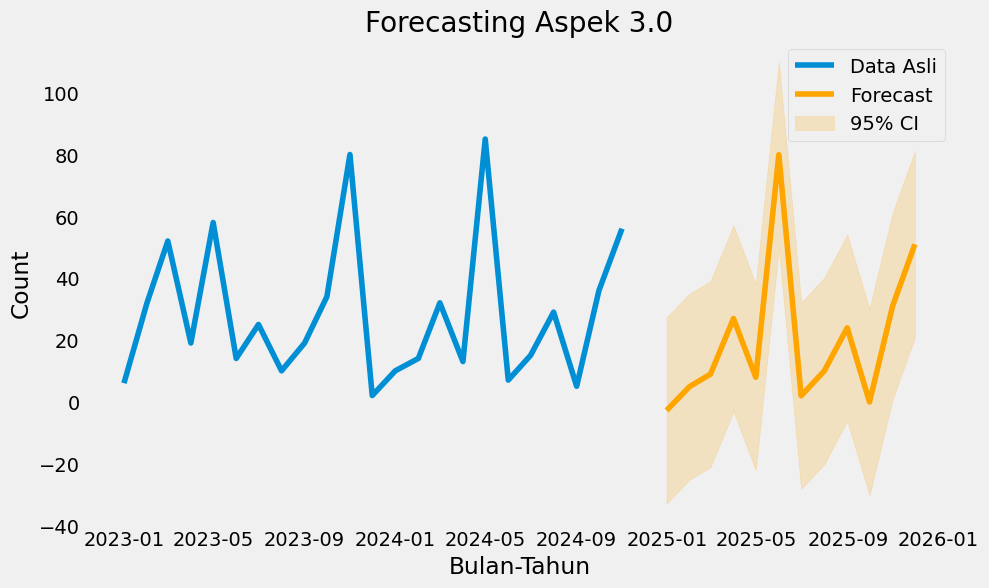

Forecasting untuk cluster 4.0


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vyuwono\AppData\Local\Temp\ipykernel_3524\2370567600.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.da

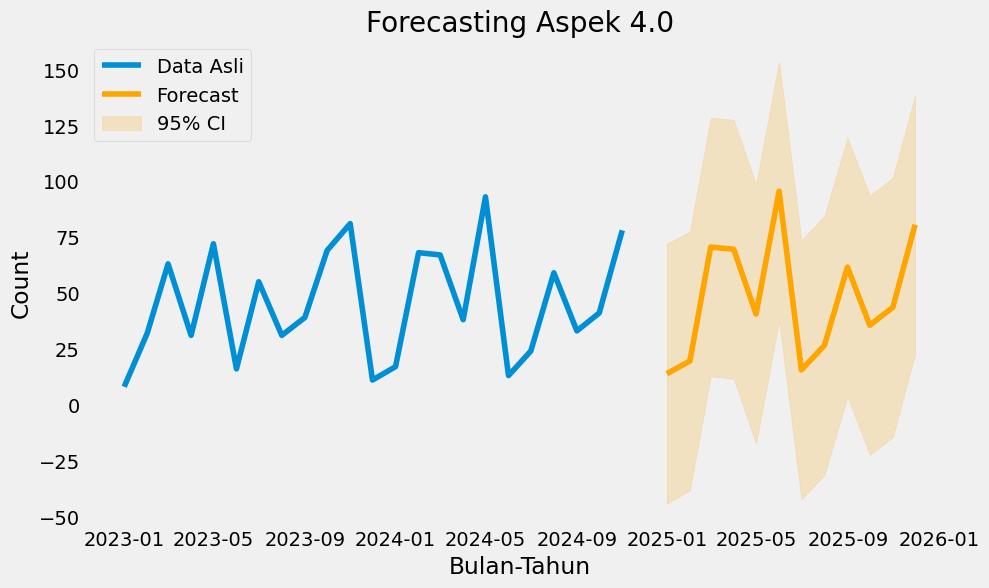

Forecasting untuk cluster 5.0


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vyuwono\AppData\Local\Temp\ipykernel_3524\2370567600.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.da

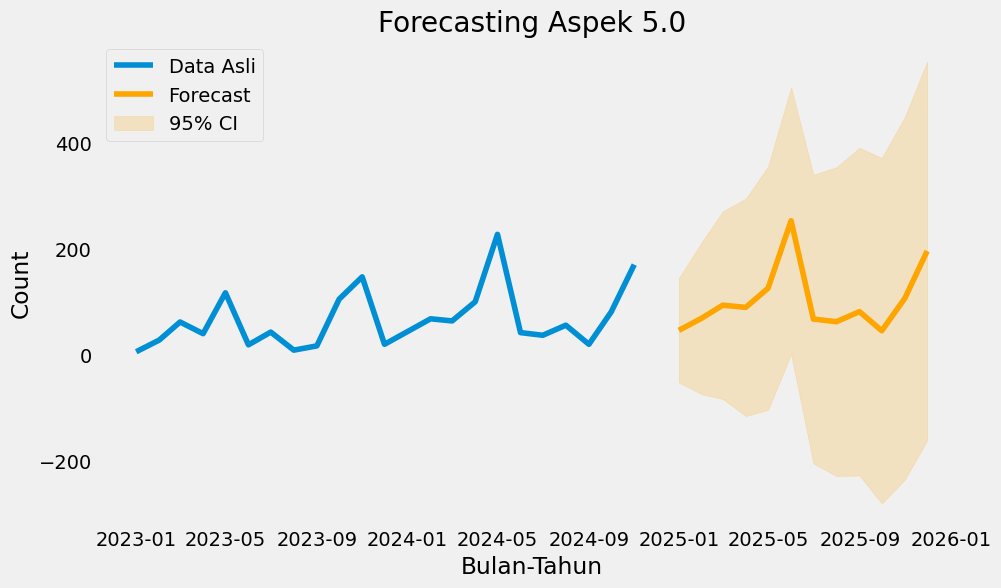

Forecasting untuk cluster 6.0


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vyuwono\AppData\Local\Temp\ipykernel_3524\2370567600.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.da

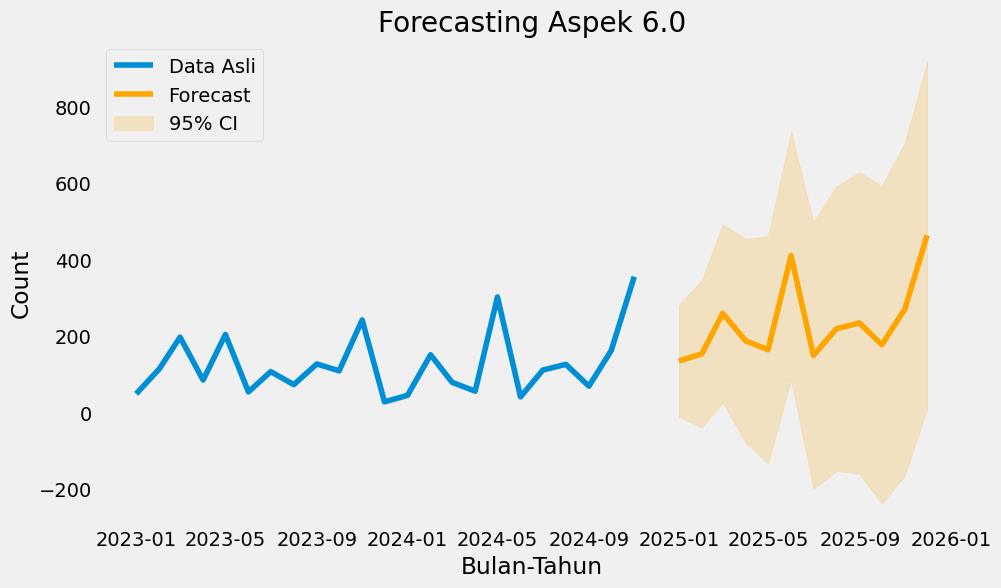

Forecast Aspek 0.0:
count             mean  mean_ci_lower  mean_ci_upper
bulan_tahun                                         
2024-12-31    6.543861     -10.362042      23.449764
2025-01-31    7.437430      -9.852030      24.726890
2025-02-28    6.543273     -10.835478      23.922023
2025-03-31   47.555810      30.113270      64.998349
2025-04-30    8.557295      -8.945969      26.060558
Forecast Aspek 1.0:
count            mean  mean_ci_lower  mean_ci_upper
bulan_tahun                                        
2024-12-31   2.665103      -0.949237       6.279443
2025-01-31   7.089704       3.474210      10.705199
2025-02-28   9.621714       5.778976      13.464452
2025-03-31   1.442055      -2.505286       5.389397
2025-04-30   2.502726      -1.578712       6.584163
Forecast Aspek 2.0:
count             mean  mean_ci_lower  mean_ci_upper
bulan_tahun                                         
2024-12-31    5.546884     -17.894158      28.987926
2025-01-31   13.551300     -11.029561      38.

In [44]:
# Forecasting per cluster
clusters = count_data['aspek'].unique()
clusters = sorted(clusters)
forecast_steps = 12  # Prediksi 12 bulan ke depan
forecasts = {}

for cluster in clusters:
    print(f"Forecasting untuk cluster {cluster}")
    cluster_data = count_data[count_data['aspek'] == cluster]['count']
    
    # Parameter SARIMA (sesuaikan jika diperlukan)
    p, d, q = 1, 1, 1
    P, D, Q, s = 1, 1, 1, 12

    # Model SARIMAX
    model = SARIMAX(
        cluster_data,
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    
    results = model.fit()
    
    # Forecast
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_index = pd.date_range(
        start=cluster_data.index[-1] + pd.DateOffset(months=1),
        periods=forecast_steps, freq='M'
    )
    forecast_df = forecast.summary_frame()
    forecast_df['bulan_tahun'] = forecast_index
    forecast_df.set_index('bulan_tahun', inplace=True)

    # Simpan hasil forecast
    forecasts[cluster] = forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']]

    # Plot hasil
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_data, label='Data Asli')
    plt.plot(forecast_df['mean'], label='Forecast', color='orange')
    plt.fill_between(
        forecast_df.index, 
        forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], 
        color='orange', alpha=0.2, label='95% CI'
    )
    plt.title(f"Forecasting Aspek {cluster}")
    plt.xlabel("Bulan-Tahun")
    plt.ylabel("Count")
    plt.legend()
    plt.grid()
    plt.show()

# Melihat hasil forecast untuk setiap cluster
for cluster, forecast_df in forecasts.items():
    print(f"Forecast Aspek {cluster}:")
    print(forecast_df.head())

# Forecasting XGBoost Aspek

In [136]:
count_data

,aspek,bulan_tahun,count
0,0.0,2023-01-01,1
66,3.0,2023-01-01,6
89,4.0,2023-01-01,8
43,2.0,2023-01-01,5
112,5.0,2023-01-01,6
...,...,...,...
64,2.0,2024-11-01,37
156,6.0,2024-11-01,355
42,1.0,2024-11-01,5
110,4.0,2024-11-01,78


In [137]:
# Ekstraksi bulan dan tahun
count_data['bulan'] = count_data['bulan_tahun'].dt.month
count_data['tahun'] = count_data['bulan_tahun'].dt.year

In [138]:
data = count_data.copy()
data.set_index('bulan_tahun', inplace=True)

In [139]:
train_data = data.loc[:'2024-05']
test_data = data.loc['2024-06':'2024-11']
test_data

,aspek,count,bulan,tahun
bulan_tahun,,,,
2024-06-01,2.0,4,6,2024
2024-06-01,6.0,41,6,2024
2024-06-01,0.0,5,6,2024
2024-06-01,3.0,7,6,2024
2024-06-01,4.0,13,6,2024
2024-06-01,5.0,42,6,2024
2024-07-01,5.0,37,7,2024
2024-07-01,3.0,15,7,2024
2024-07-01,2.0,12,7,2024


In [140]:
X_train = train_data[['tahun', 'bulan']]
y_train = train_data['count']
X_test = test_data[['tahun', 'bulan']]
y_test = test_data['count']


In [141]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:67.64833	validation_1-rmse:77.63751
[100]	validation_0-rmse:52.61020	validation_1-rmse:61.73439


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\xgboost\core.py:158: UserWarning: [11:03:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:48.88309	validation_1-rmse:59.77160
[300]	validation_0-rmse:47.87377	validation_1-rmse:59.30972
[400]	validation_0-rmse:47.51744	validation_1-rmse:59.08951
[500]	validation_0-rmse:47.37812	validation_1-rmse:59.04100
[522]	validation_0-rmse:47.35858	validation_1-rmse:59.05574


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

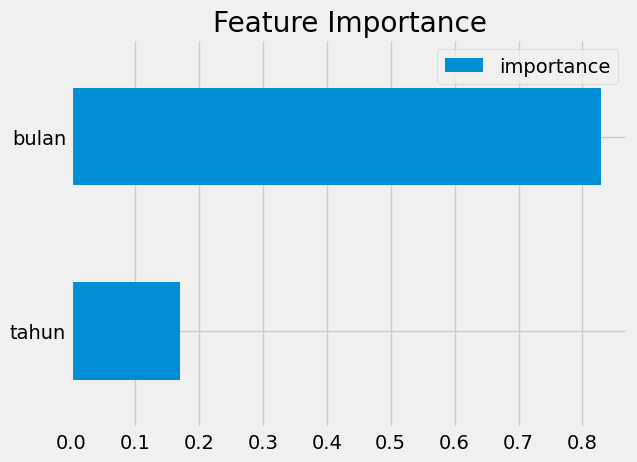

In [142]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

C:\Users\vyuwono\AppData\Local\Temp\ipykernel_3524\2225095763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = reg.predict(X_test)


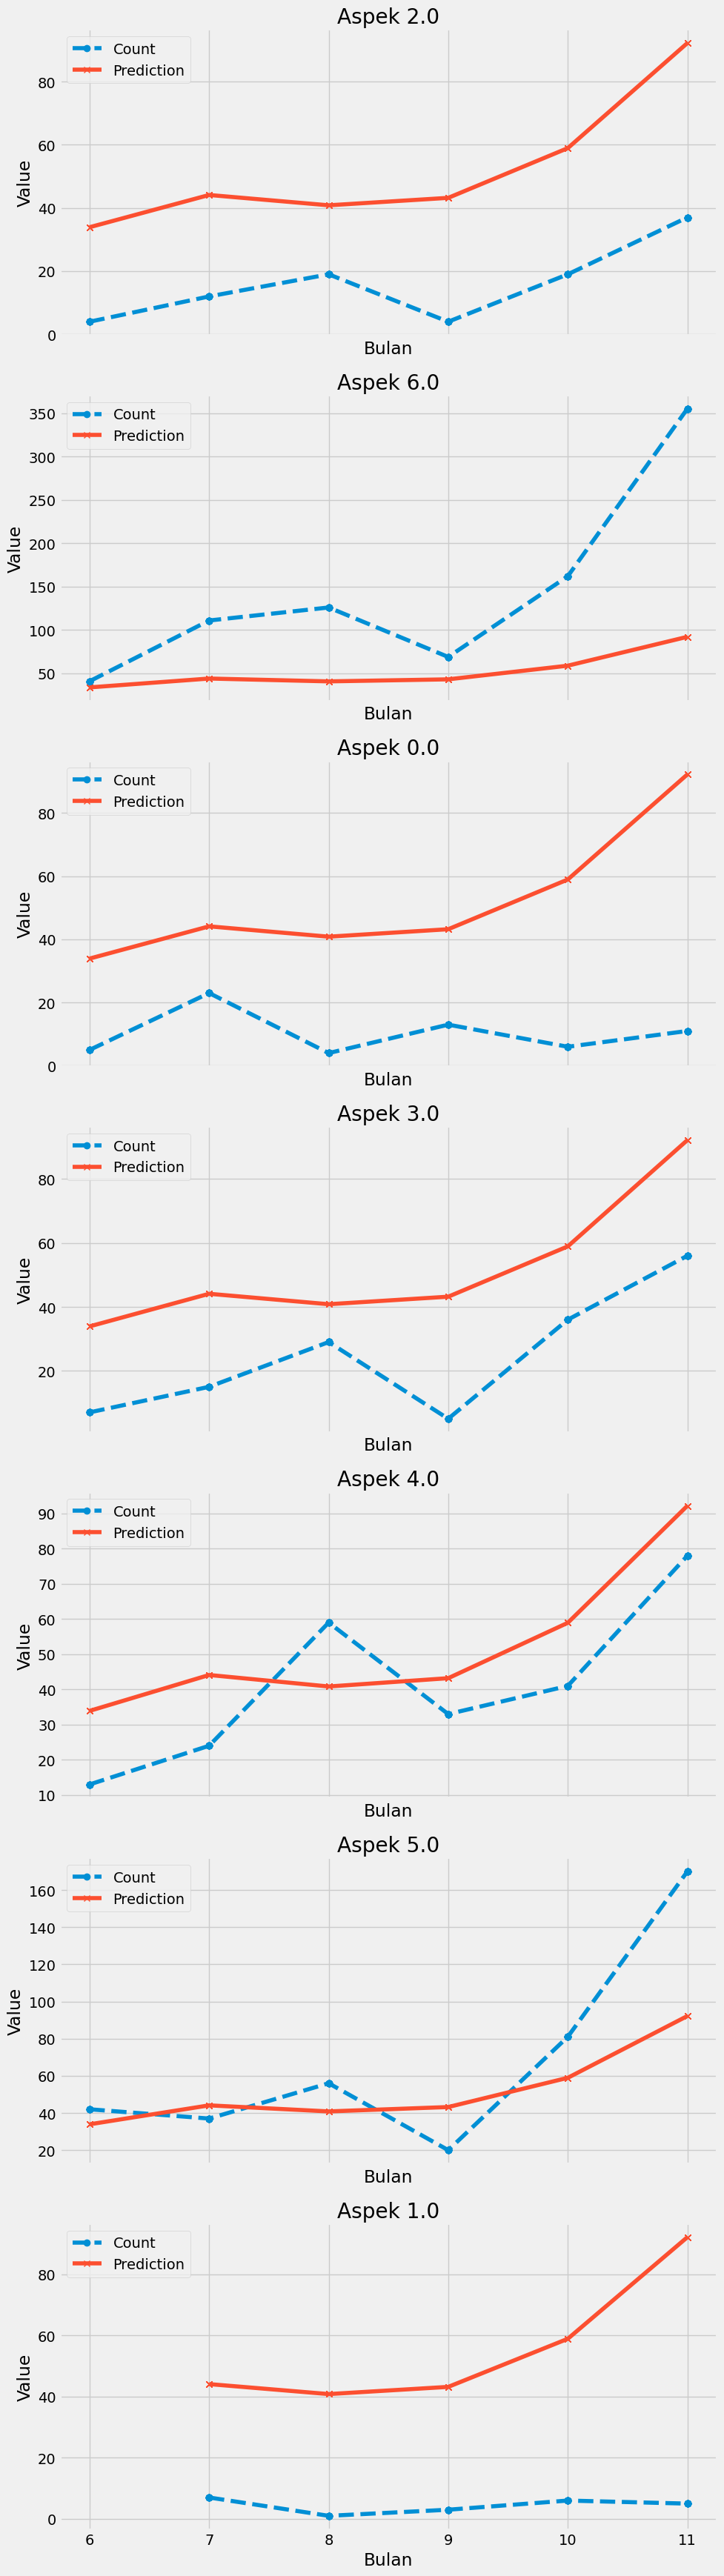

In [144]:
test_data['prediction'] = reg.predict(X_test)
df = data.merge(test_data[['prediction']], how='left', left_index=True, right_index=True)

# Filter data dengan prediction yang tidak NaN
df = df.dropna(subset=['prediction'])

# Membuat grafik untuk setiap cluster
clusters = df['aspek'].unique()
fig, ax = plt.subplots(len(clusters), 1, figsize=(10, 5 * len(clusters)), sharex=True)

if len(clusters) == 1:  # Jika hanya ada satu cluster
    ax = [ax]  # Bungkus agar tetap iterable

for i, cluster in enumerate(clusters):
    cluster_data = df[df['aspek'] == cluster]
    ax[i].plot(cluster_data['bulan'], cluster_data['count'], label='Count', marker='o', linestyle='--')
    ax[i].plot(cluster_data['bulan'], cluster_data['prediction'], label='Prediction', marker='x', linestyle='-')
    ax[i].set_title(f'Aspek {cluster}')
    ax[i].set_xlabel('Bulan')
    ax[i].set_ylabel('Value')
    ax[i].legend()

# Menyesuaikan layout
plt.tight_layout()
plt.show()

In [145]:
score = np.sqrt(mean_squared_error(df['count'], df['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

mean_count = df['count'].mean()
std_count = df['count'].std()
print(f"Mean Count: {mean_count}, Std Count: {std_count}")


RMSE Score on Test set: 59.57
Mean Count: 45.562277580071175, Std Count: 64.63560385903943


# Forecasting Per Cluster

In [98]:
count_data = merged_data.groupby(['cluster', 'bulan_tahun']).size().reset_index(name='count')
count_data

,cluster,bulan_tahun,count
0,0,01-2023,11
1,0,01-2024,20
2,0,02-2023,50
3,0,02-2024,62
4,0,03-2023,45
...,...,...,...
109,4,10-2023,104
110,4,10-2024,27
111,4,11-2023,101
112,4,11-2024,166


In [99]:
count_data['bulan_tahun'] = pd.to_datetime(count_data['bulan_tahun'], format='%m-%Y')

In [100]:
count_data

,cluster,bulan_tahun,count
0,0,2023-01-01,11
1,0,2024-01-01,20
2,0,2023-02-01,50
3,0,2024-02-01,62
4,0,2023-03-01,45
...,...,...,...
109,4,2023-10-01,104
110,4,2024-10-01,27
111,4,2023-11-01,101
112,4,2024-11-01,166


In [101]:
count_data = count_data.sort_values(by='bulan_tahun')
count_data

,cluster,bulan_tahun,count
0,0,2023-01-01,11
23,1,2023-01-01,27
46,2,2023-01-01,28
91,4,2023-01-01,9
2,0,2023-02-01,50
...,...,...,...
112,4,2024-11-01,166
21,0,2024-11-01,60
89,3,2024-11-01,29
67,2,2024-11-01,267


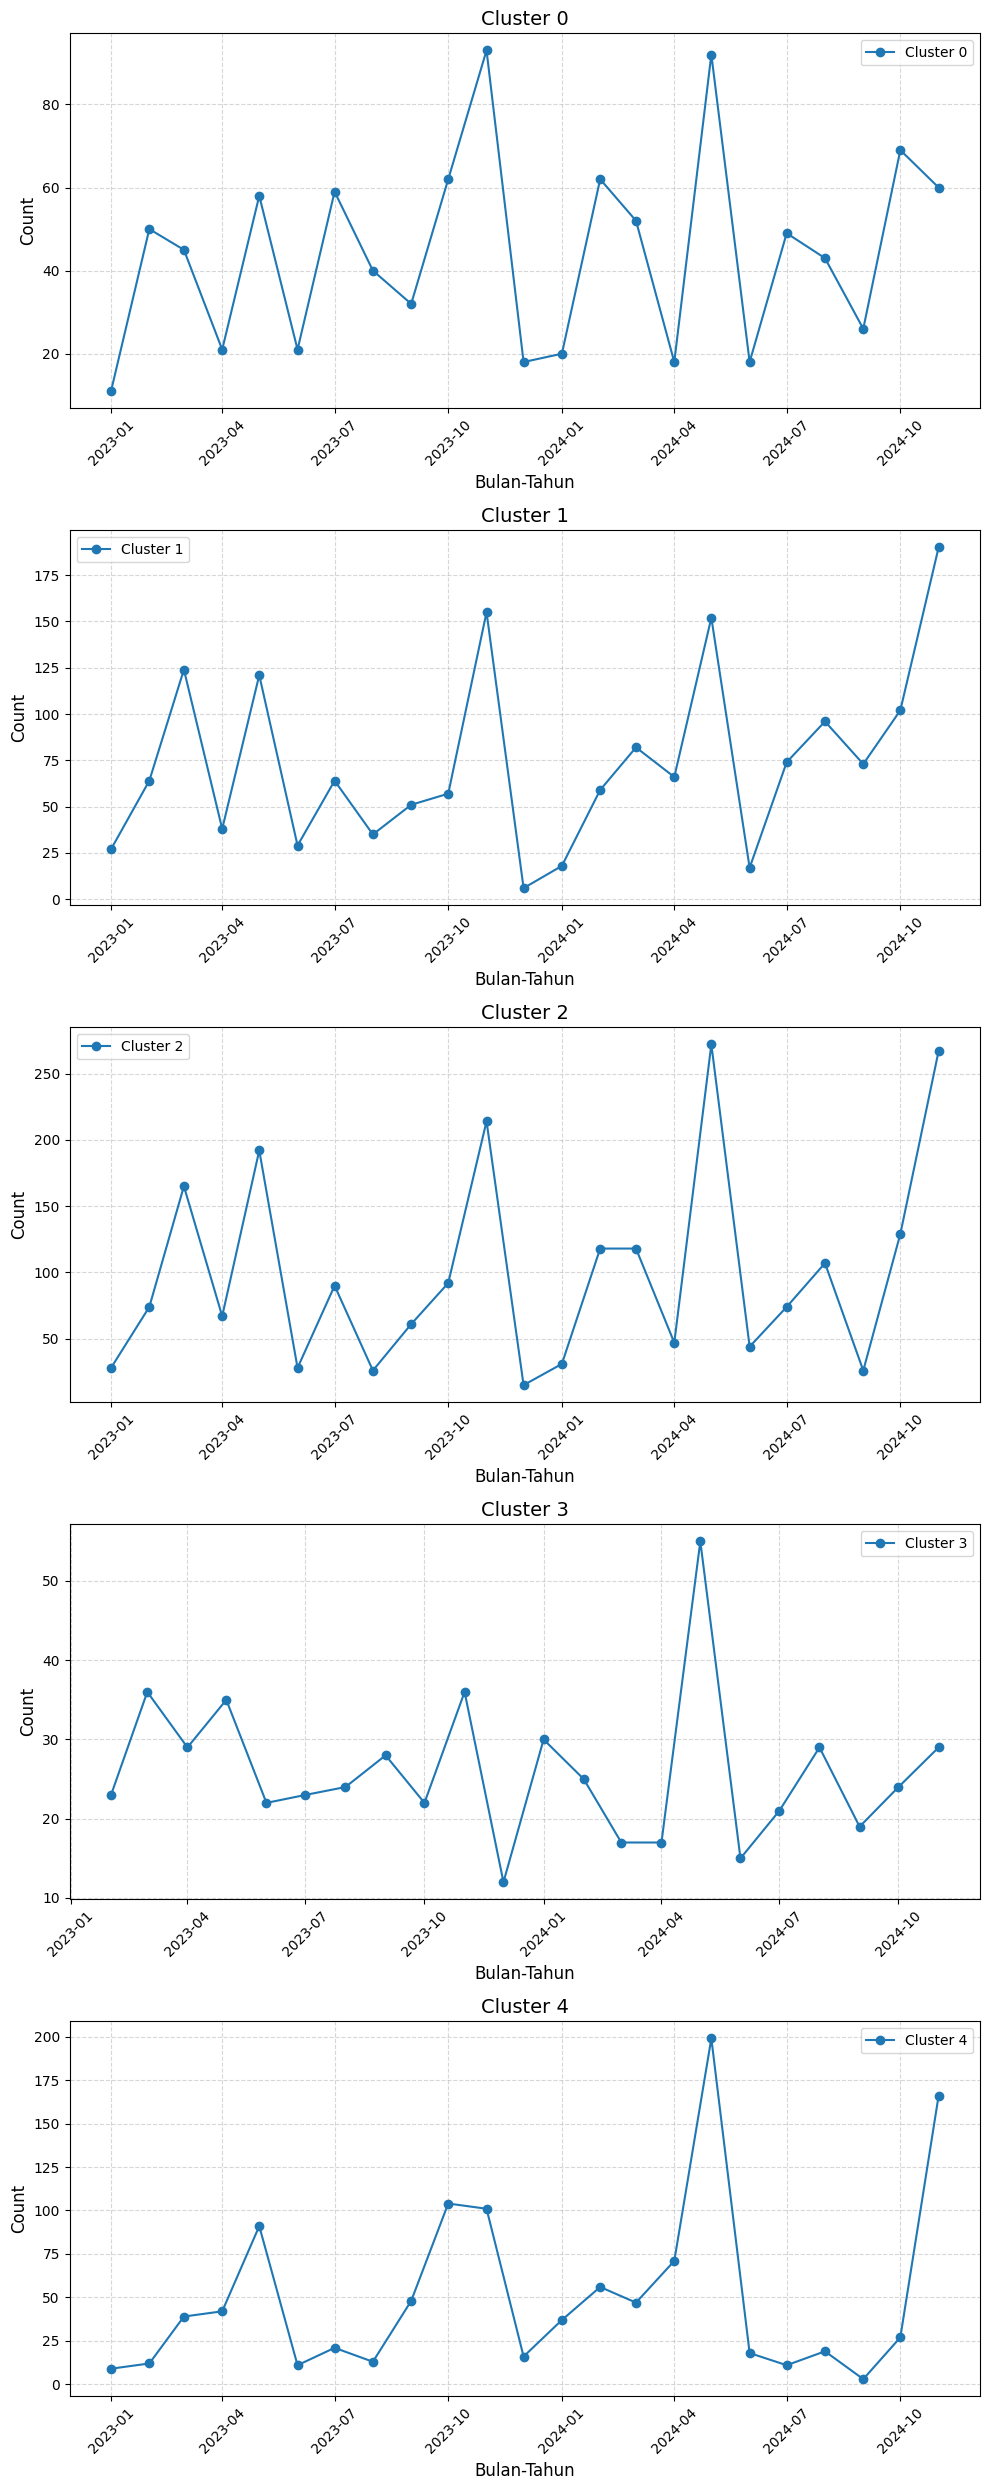

In [201]:
# Mendapatkan jumlah cluster unik
clusters = count_data['cluster'].unique()
clusters = sorted(clusters)

# Membuat subplots
fig, axes = plt.subplots(nrows=len(clusters), ncols=1, figsize=(10, 5 * len(clusters)))

# Jika hanya ada satu cluster, jadikan axes sebagai list
if len(clusters) == 1:
    axes = [axes]

# Iterasi setiap cluster untuk plot di subplot masing-masing
for ax, cluster_id in zip(axes, clusters):
    # Filter data per cluster
    cluster_data = count_data[count_data['cluster'] == cluster_id]
    
    # Plot line chart untuk cluster ini
    ax.plot(cluster_data['bulan_tahun'], cluster_data['count'], marker='o', label=f'Cluster {cluster_id}')
    
    # Detail plot
    ax.set_title(f'Cluster {cluster_id}', fontsize=14)
    ax.set_xlabel('Bulan-Tahun', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Tampilkan grafik
plt.show()

In [206]:
count_data.set_index('bulan_tahun', inplace=True)

In [209]:
count_data

,cluster,count
bulan_tahun,,
2023-01-01,0,11
2023-01-01,1,27
2023-01-01,2,28
2023-01-01,4,9
2023-02-01,0,50
...,...,...
2024-11-01,4,166
2024-11-01,0,60
2024-11-01,3,29


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is av

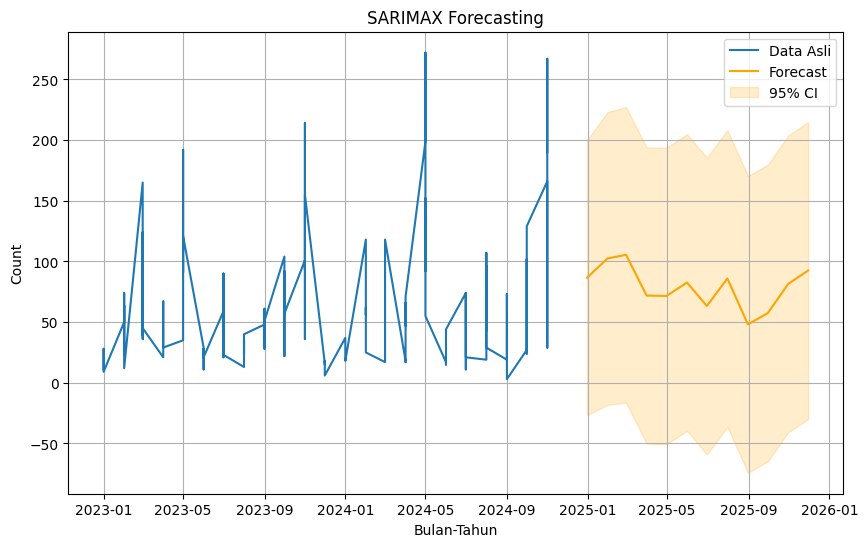

count              mean  mean_ci_lower  mean_ci_upper
bulan_tahun                                          
2024-12-31    86.584982     -26.605388     199.775352
2025-01-31   102.481413     -18.184760     223.147587
2025-02-28   105.444054     -16.385599     227.273707
2025-03-31    71.857953     -50.224509     193.940415
2025-04-30    71.549856     -50.627601     193.727313
2025-05-31    82.630941     -39.623648     204.885530
2025-06-30    63.290517     -59.032337     185.613370
2025-07-31    85.969281     -36.334635     208.273198
2025-08-31    48.167842     -74.135215     170.470899
2025-09-30    57.391139     -64.910593     179.692871
2025-10-31    81.591852     -40.709777     203.893481
2025-11-30    92.484435     -29.818424     214.787294


In [211]:
# Parameter SARIMAX (misalnya, musiman bulanan = 12)
p, d, q = 1, 1, 1  # ARIMA orders
P, D, Q, s = 1, 1, 1, 12  # Musiman orders

# Membuat model SARIMAX
model = SARIMAX(
    count_data['count'],
    order=(p, d, q),
    seasonal_order=(P, D, Q, s),
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit model
results = model.fit()

# Prediksi (misal 12 bulan ke depan)
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=count_data.index[-1] + pd.DateOffset(months=1), 
                               periods=forecast_steps, freq='M')

# Membuat DataFrame untuk prediksi
forecast_df = forecast.summary_frame(alpha=0.05)  # 95% CI
forecast_df['bulan_tahun'] = forecast_index
forecast_df.set_index('bulan_tahun', inplace=True)

# Gabungkan dengan data asli untuk visualisasi
combined = pd.concat([count_data, forecast_df[['mean']]], axis=0)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(count_data.index, count_data['count'], label='Data Asli')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='orange')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], 
                 color='orange', alpha=0.2, label='95% CI')
plt.title("SARIMAX Forecasting")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.show()

# Print hasil prediksi
print(forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']])

Forecasting untuk cluster 0


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vyuwono\AppData\Local\Temp\ipykernel_18396\1663845364.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.d

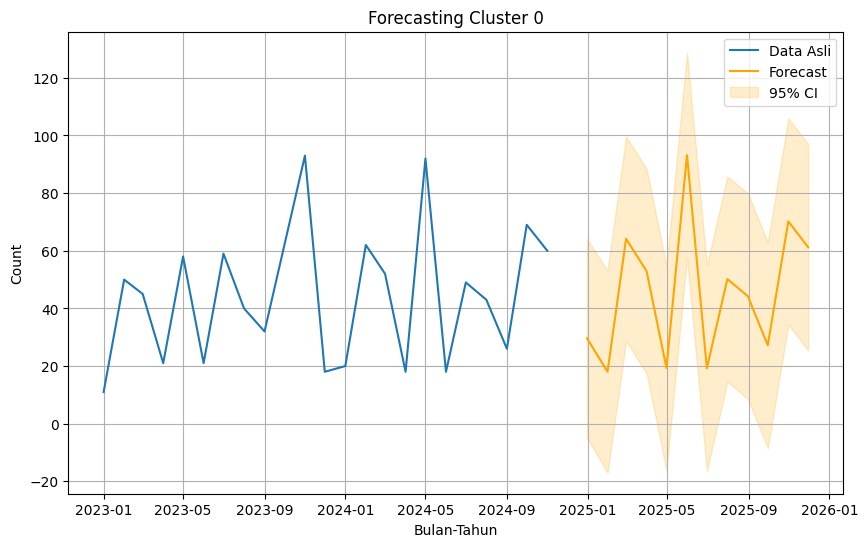

Forecasting untuk cluster 1


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vyuwono\AppData\Local\Temp\ipykernel_18396\1663845364.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.d

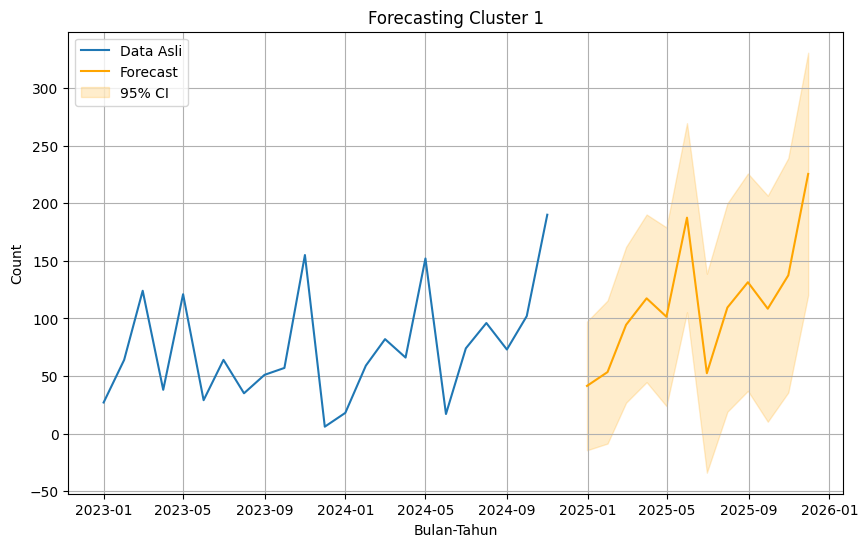

Forecasting untuk cluster 2


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vyuwono\AppData\Local\Temp\ipykernel_18396\1663845364.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.d

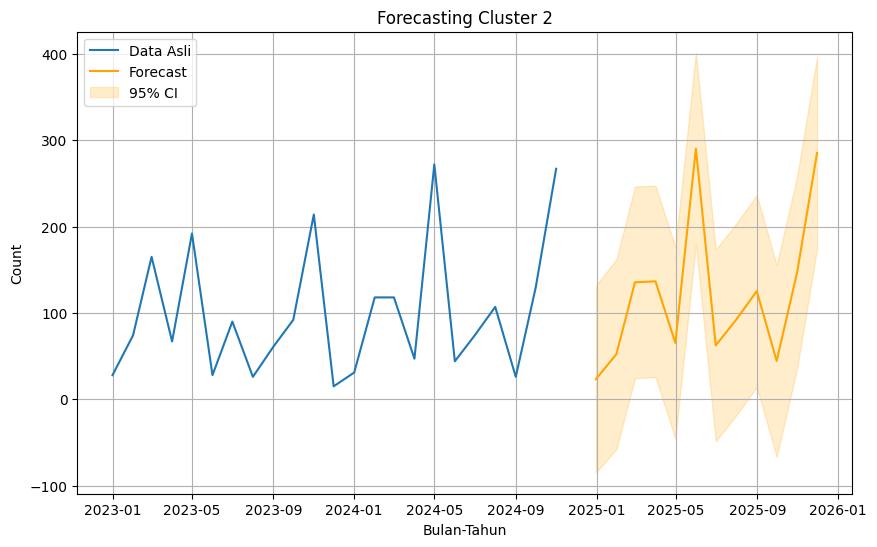

Forecasting untuk cluster 4


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vyuwono\AppData\Local\Temp\ipykernel_18396\1663845364.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.d

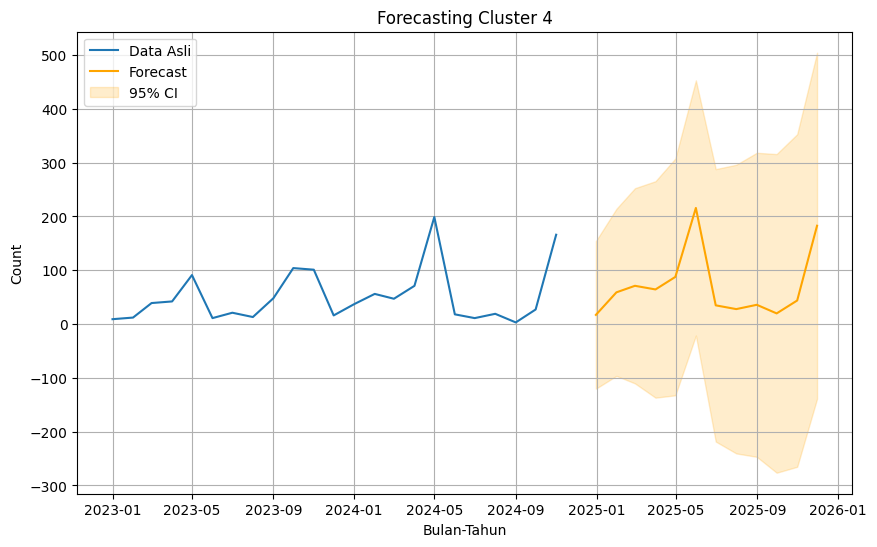

Forecasting untuk cluster 3


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vyuwono\AppData\Local\Temp\ipykernel_18396\1663845364.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.d

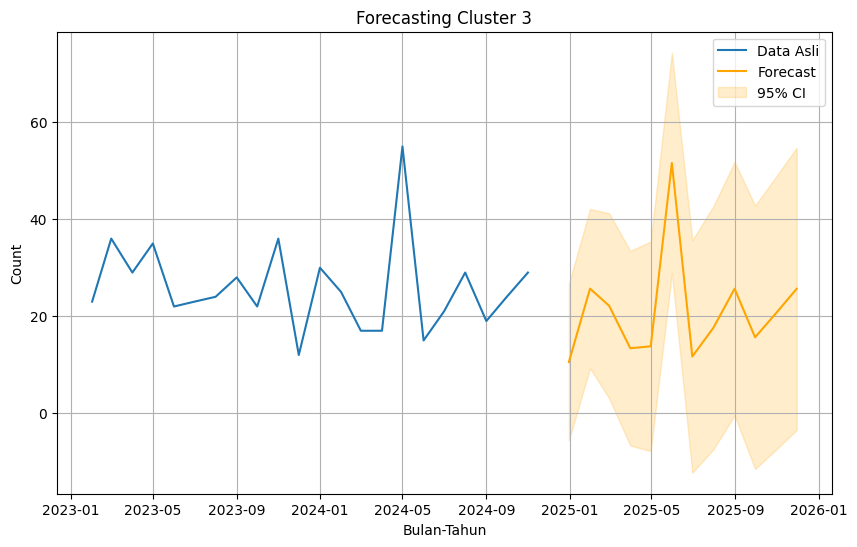

Forecast Cluster 0:
count             mean  mean_ci_lower  mean_ci_upper
bulan_tahun                                         
2024-12-31   29.606556      -4.890500      64.103613
2025-01-31   18.032859     -17.021385      53.087103
2025-02-28   64.163312      28.698406      99.628217
2025-03-31   52.906422      17.461365      88.351479
2025-04-30   19.288891     -16.223041      54.800824
Forecast Cluster 1:
count              mean  mean_ci_lower  mean_ci_upper
bulan_tahun                                          
2024-12-31    41.412146     -14.459541      97.283833
2025-01-31    53.414590      -8.654361     115.483541
2025-02-28    94.414605      26.781427     162.047782
2025-03-31   117.414605      44.641778     190.187431
2025-04-30   101.414605      23.841919     178.987290
Forecast Cluster 2:
count              mean  mean_ci_lower  mean_ci_upper
bulan_tahun                                          
2024-12-31    23.311703     -85.037847     131.661253
2025-01-31    52.288398     -

In [212]:
# Forecasting per cluster
clusters = count_data['cluster'].unique()
forecast_steps = 12  # Prediksi 12 bulan ke depan
forecasts = {}

for cluster in clusters:
    print(f"Forecasting untuk cluster {cluster}")
    cluster_data = count_data[count_data['cluster'] == cluster]['count']
    
    # Parameter SARIMA (sesuaikan jika diperlukan)
    p, d, q = 1, 1, 1
    P, D, Q, s = 1, 1, 1, 12

    # Model SARIMAX
    model = SARIMAX(
        cluster_data,
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    
    results = model.fit()
    
    # Forecast
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_index = pd.date_range(
        start=cluster_data.index[-1] + pd.DateOffset(months=1),
        periods=forecast_steps, freq='M'
    )
    forecast_df = forecast.summary_frame()
    forecast_df['bulan_tahun'] = forecast_index
    forecast_df.set_index('bulan_tahun', inplace=True)

    # Simpan hasil forecast
    forecasts[cluster] = forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']]

    # Plot hasil
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_data, label='Data Asli')
    plt.plot(forecast_df['mean'], label='Forecast', color='orange')
    plt.fill_between(
        forecast_df.index, 
        forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], 
        color='orange', alpha=0.2, label='95% CI'
    )
    plt.title(f"Forecasting Cluster {cluster}")
    plt.xlabel("Bulan-Tahun")
    plt.ylabel("Count")
    plt.legend()
    plt.grid()
    plt.show()

# Melihat hasil forecast untuk setiap cluster
for cluster, forecast_df in forecasts.items():
    print(f"Forecast Cluster {cluster}:")
    print(forecast_df.head())

# Forecasting XGBoost Cluster

In [102]:
count_data

,cluster,bulan_tahun,count
0,0,2023-01-01,11
23,1,2023-01-01,27
46,2,2023-01-01,28
91,4,2023-01-01,9
2,0,2023-02-01,50
...,...,...,...
112,4,2024-11-01,166
21,0,2024-11-01,60
89,3,2024-11-01,29
67,2,2024-11-01,267


In [103]:
# Ekstraksi bulan dan tahun
count_data['bulan'] = count_data['bulan_tahun'].dt.month
count_data['tahun'] = count_data['bulan_tahun'].dt.year

In [104]:
count_data

,cluster,bulan_tahun,count,bulan,tahun
0,0,2023-01-01,11,1,2023
23,1,2023-01-01,27,1,2023
46,2,2023-01-01,28,1,2023
91,4,2023-01-01,9,1,2023
2,0,2023-02-01,50,2,2023
...,...,...,...,...,...
112,4,2024-11-01,166,11,2024
21,0,2024-11-01,60,11,2024
89,3,2024-11-01,29,11,2024
67,2,2024-11-01,267,11,2024


In [105]:
data = count_data.copy()
data.set_index('bulan_tahun', inplace=True)

In [106]:
train_data = data.loc[:'2024-05']
test_data = data.loc['2024-06':'2024-11']
test_data

,cluster,count,bulan,tahun
bulan_tahun,,,,
2024-06-01,1,17,6,2024
2024-06-01,3,15,6,2024
2024-06-01,4,18,6,2024
2024-06-01,0,18,6,2024
2024-06-01,2,44,6,2024
2024-07-01,2,74,7,2024
2024-07-01,4,11,7,2024
2024-07-01,1,74,7,2024
2024-07-01,0,49,7,2024


In [110]:
X_train = train_data[['tahun', 'bulan']]
y_train = train_data['count']
X_test = test_data[['tahun', 'bulan']]
y_test = test_data['count']


In [111]:
X_train

,tahun,bulan
bulan_tahun,,
2023-01-01,2023,1
2023-01-01,2023,1
2023-01-01,2023,1
2023-01-01,2023,1
2023-02-01,2023,2
...,...,...
2024-05-01,2024,5
2024-05-01,2024,5
2024-05-01,2024,5


In [112]:
y_train

bulan_tahun
2023-01-01     11
2023-01-01     27
2023-01-01     28
2023-01-01      9
2023-02-01     50
             ... 
2024-05-01    199
2024-05-01    272
2024-05-01     92
2024-05-01    152
2024-05-01     55
Name: count, Length: 84, dtype: int64

In [113]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:76.48102	validation_1-rmse:84.79208


c:\Users\vyuwono\AppData\Local\miniconda3\envs\vyuwono_310\lib\site-packages\xgboost\core.py:158: UserWarning: [10:50:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:48.54082	validation_1-rmse:56.11893
[200]	validation_0-rmse:39.98446	validation_1-rmse:50.52210
[300]	validation_0-rmse:37.24045	validation_1-rmse:48.67548
[400]	validation_0-rmse:36.24275	validation_1-rmse:47.88193
[500]	validation_0-rmse:35.83493	validation_1-rmse:47.53503
[590]	validation_0-rmse:35.64074	validation_1-rmse:47.52194


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

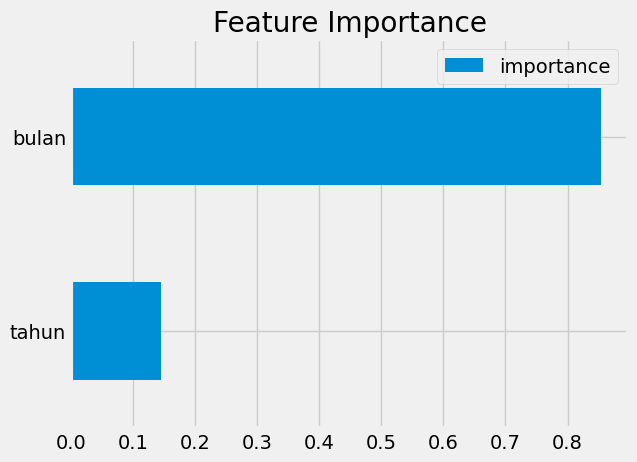

In [114]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

C:\Users\vyuwono\AppData\Local\Temp\ipykernel_3524\1234622026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = reg.predict(X_test)


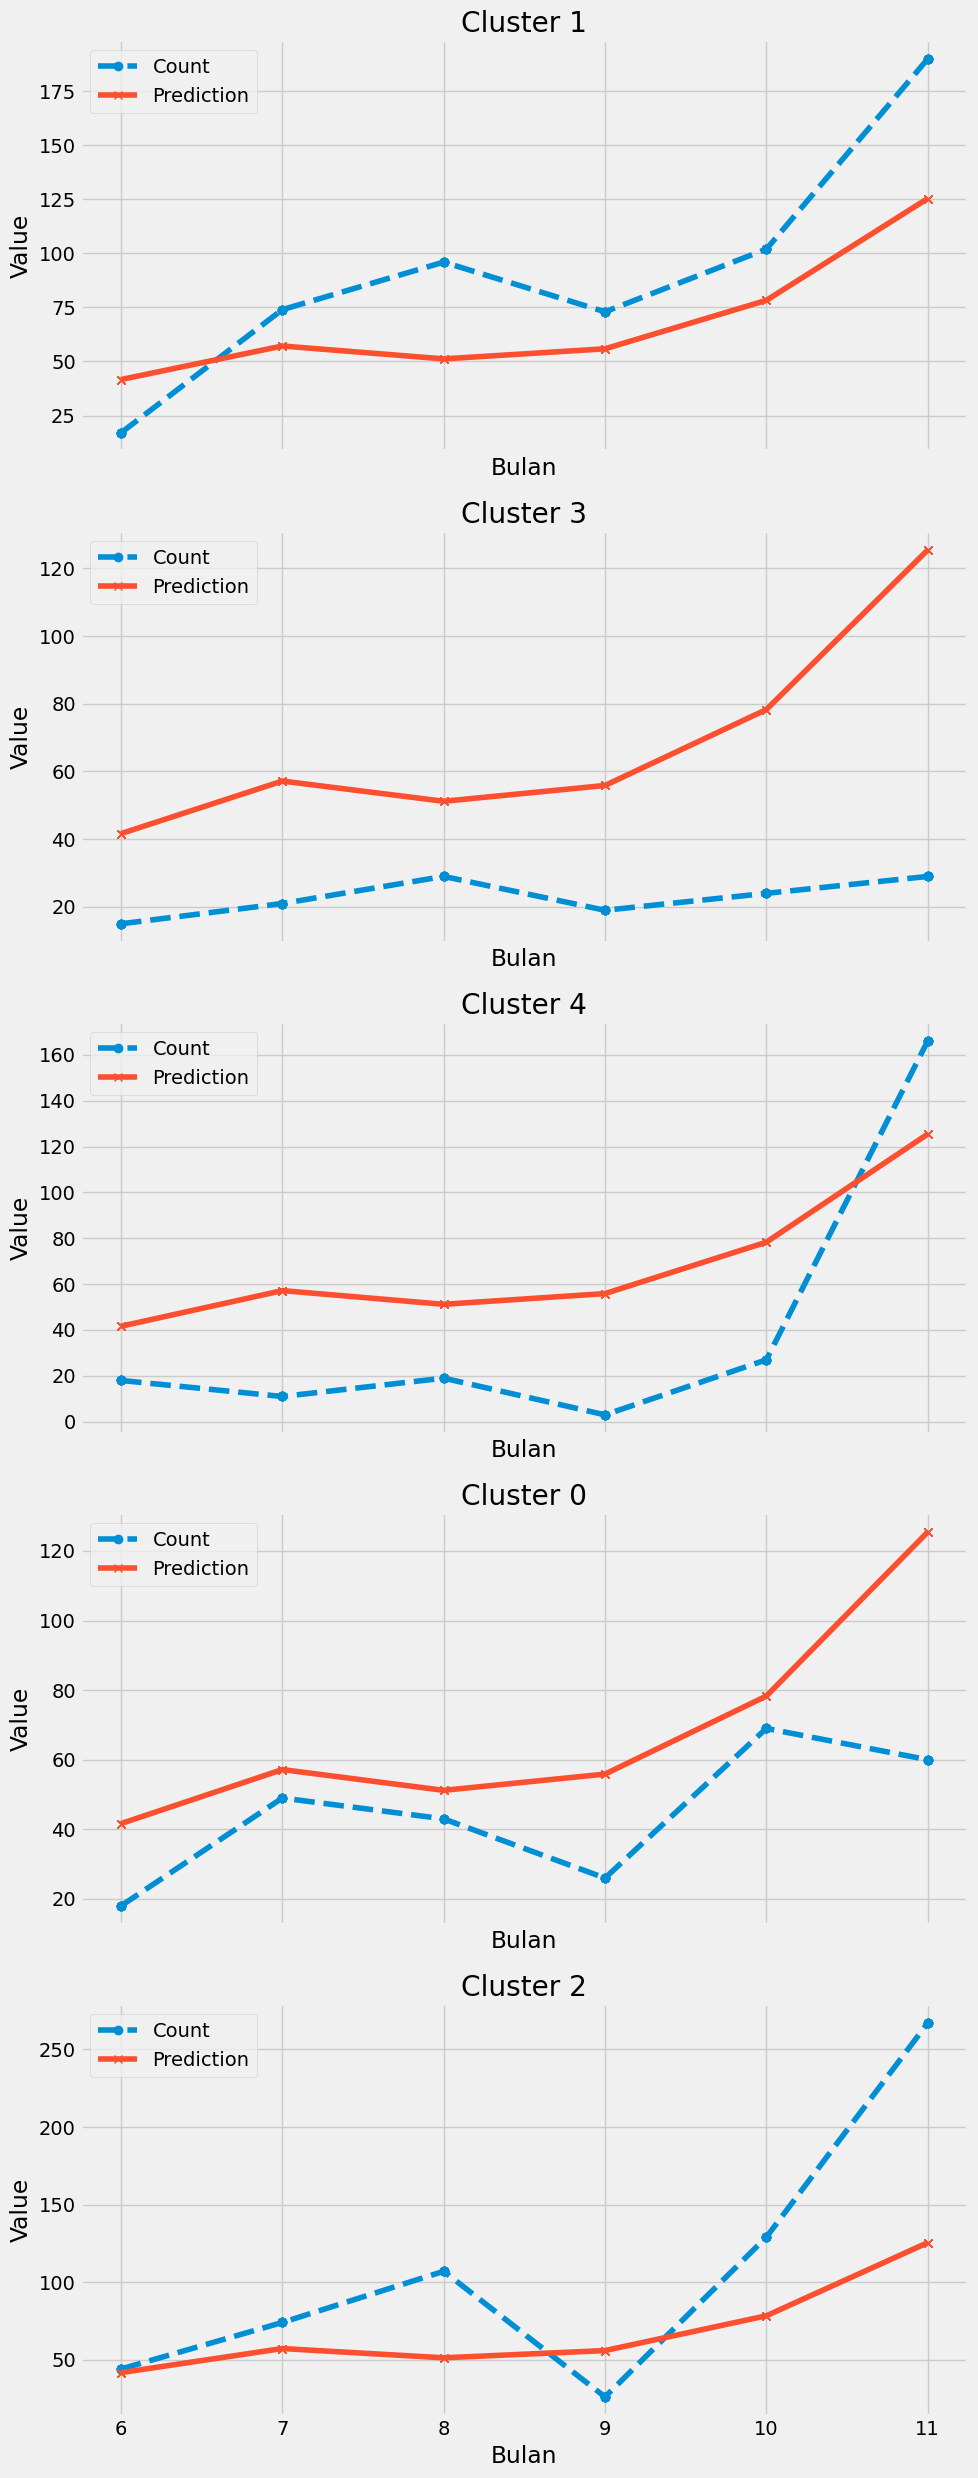

In [127]:
test_data['prediction'] = reg.predict(X_test)
df = data.merge(test_data[['prediction']], how='left', left_index=True, right_index=True)

# Filter data dengan prediction yang tidak NaN
df = df.dropna(subset=['prediction'])

# Membuat grafik untuk setiap cluster
clusters = df['cluster'].unique()
fig, ax = plt.subplots(len(clusters), 1, figsize=(10, 5 * len(clusters)), sharex=True)

if len(clusters) == 1:  # Jika hanya ada satu cluster
    ax = [ax]  # Bungkus agar tetap iterable

for i, cluster in enumerate(clusters):
    cluster_data = df[df['cluster'] == cluster]
    ax[i].plot(cluster_data['bulan'], cluster_data['count'], label='Count', marker='o', linestyle='--')
    ax[i].plot(cluster_data['bulan'], cluster_data['prediction'], label='Prediction', marker='x', linestyle='-')
    ax[i].set_title(f'Cluster {cluster}')
    ax[i].set_xlabel('Bulan')
    ax[i].set_ylabel('Value')
    ax[i].legend()

# Menyesuaikan layout
plt.tight_layout()
plt.show()

In [131]:
score = np.sqrt(mean_squared_error(df['count'], df['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 47.51


In [132]:
mean_count = df['count'].mean()
std_count = df['count'].std()
print(f"Mean Count: {mean_count}, Std Count: {std_count}")


Mean Count: 61.5, Std Count: 59.86828383539963
